Steady state heat equation
======

This notebook will setup and solve the steady state heat equation:

\\[
\nabla(k\nabla)T = h
\\]

where $k$ is the diffusivity, T the temperature field and $h$ the source term.

**Keywords:** initial conditions, boundary conditions, heat equation

In [19]:
import UWGeodynamics as GEO

Setup parameters
-----

In [20]:
u = GEO.UnitRegistry

In [21]:
model_length = 20. * u.centimeter
model_height = 10. * u.centimeter
top_Temp = 273.15 * u.degK
base_Temp = 1603.15 * u.degK

KL = model_height
KT = (base_Temp - top_Temp)

GEO.scaling.scaling["[length]"] = KL
GEO.scaling.scaling["[temperature]"]= KT

Create mesh and variables
------

In [8]:
Model = GEO.Model(elementRes=(16, 8), 
                  minCoord=(0. * u.centimeter, 0. * u.centimeter), 
                  maxCoord=(20. * u.centimeter, 10. * u.centimeter))

In [9]:
Model.set_temperatureBCs(top=273.15 * u.degK, bottom=1603.15 * u.degK)



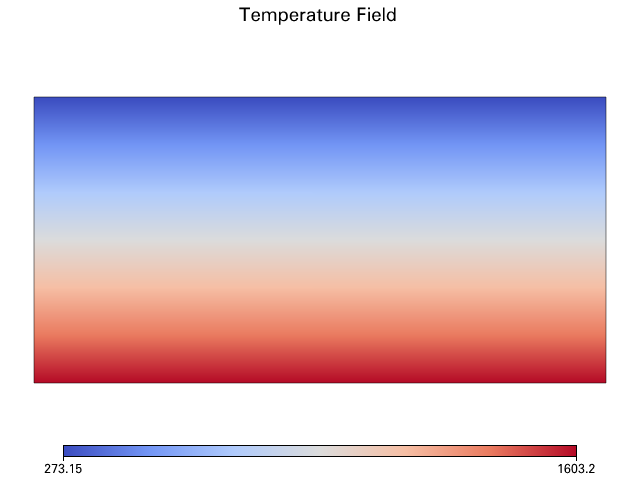

In [18]:
Fig = Model.plot.temperature()

Heat Equation System setup & solve
-----

Temperature field, diffusivity and boundary conditions are passed to the SteadyStateHeat system function.

In [11]:
Model.diffusivity = 1.0 * u.centimetre**2 / u.hour
Model.radiogenicHeatProd = 0.0 * u.microwatt

In [12]:
Model.solve_temperature_steady_state()


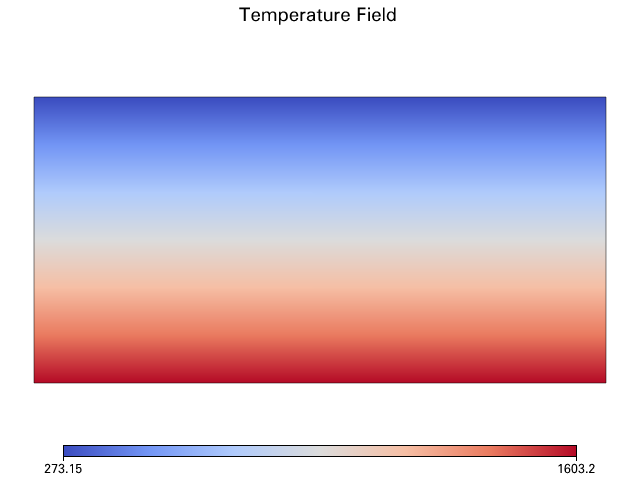

In [13]:
Fig = Model.plot.temperature()